In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.neighbors import KDTree
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
import matplotlib.pyplot as plt
import math
from collections import defaultdict
import operator
import scipy as sp
from sklearn import preprocessing
import json
import pandas as pd
from scipy.stats import gamma
from math import log2
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DESIRED_SPECIES = "AT"

# CODE

In [ ]:
def data_location(main_path,data, proteins):
  array = []
  for protein in proteins:
    array.append(str(main_path+data+protein))
  return array
AT_original = "/content/drive/MyDrive/DistanceClassifier/data/ATOriginal"

In [ ]:

classes = ['ER', 'ERDD', 'GEO', 'GEOGD', 'HGG', 'Original', 'SF', 'SFDD'] #Sticky
data_proteins = data_location("/content/drive/MyDrive/DistanceClassifier/data/", DESIRED_SPECIES, classes)

In [ ]:
def combine_data(data_location):
  df_comb = pd.DataFrame()
  for protein in data_location:
    df = pd.read_csv(protein, header = None, sep = ' ')
    df['class'] = protein[49:]
    df_comb = pd.concat([df, df_comb])
  return df_comb

In [ ]:
df_comb = combine_data(data_proteins)
df_comb = df_comb.sample(frac=1).reset_index(drop=True)
df_class = df_comb['class']
df_comb = df_comb.drop("class", axis = 1)
df_comb = pd.DataFrame(MinMaxScaler().fit_transform(df_comb))
df_comb['class'] = df_class.reset_index(drop = True)

In [ ]:
df_comb#[df_comb['class'] == "Original"]

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,class
0,0.108406,0.011703,0.022880,0.051760,9.933190e-05,0.129290,9.858259e-04,8.692375e-04,0.000099,0.171133,...,2.952367e-02,4.073096e-06,0.000009,0.000144,0.010334,0.000013,0.000523,0.000007,8.457509e-08,SFDD
1,0.112006,0.012408,0.026719,0.049414,1.362727e-04,0.146453,1.242526e-03,8.848375e-04,0.000139,0.171966,...,4.383795e-02,3.235247e-06,0.000013,0.000177,0.013512,0.000019,0.000595,0.000012,2.732426e-07,SFDD
2,0.122620,0.011666,0.022170,0.044653,1.241955e-04,0.101636,9.077598e-04,7.653913e-04,0.000100,0.141808,...,2.386014e-02,4.344763e-06,0.000009,0.000102,0.007362,0.000013,0.000336,0.000006,1.171040e-07,SFDD
3,0.488885,0.172598,0.534881,0.567442,4.186815e-02,0.000152,3.160529e-01,2.740561e-01,0.246609,0.507170,...,7.636107e-04,4.878682e-02,0.339747,0.391679,0.000170,0.343436,0.001152,0.323620,8.647127e-02,HGG
4,0.119280,0.000688,0.124804,0.001156,5.990471e-07,0.001486,7.201814e-04,2.089581e-03,0.006290,0.001112,...,1.958636e-03,6.217531e-07,0.000071,0.000465,0.000492,0.000239,0.000431,0.000465,1.907689e-04,GEOGD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,0.119169,0.002137,0.000030,0.004060,3.731123e-06,0.000013,4.228280e-07,1.772724e-08,0.000000,0.004582,...,2.594416e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,ER
3245,0.171794,0.000118,0.138554,0.000131,3.709276e-08,0.000583,4.640335e-04,1.723584e-03,0.006988,0.000086,...,6.193241e-04,2.238116e-07,0.000040,0.000258,0.000152,0.000161,0.000190,0.000367,1.978602e-04,GEO
3246,0.123585,0.002173,0.000066,0.004145,3.805861e-06,0.000014,8.861567e-07,1.772724e-08,0.000000,0.004701,...,4.447570e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,ER
3247,0.232399,0.131057,0.300381,0.328935,3.845273e-02,0.000167,1.776653e-01,1.226071e-01,0.090121,0.297002,...,8.150172e-04,2.123592e-02,0.123724,0.159022,0.000149,0.117743,0.000812,0.083439,2.027141e-02,HGG


In [ ]:
df_comb['class'].value_counts()

SFDD        500
GEOGD       500
ERDD        500
GEO         499
ER          499
SF          499
HGG         251
Original      1
Name: class, dtype: int64

create 499 slightly perturbed original's. take every number and perturbe by small amount. gaussian or uniform, approx 10e-4

In [ ]:
x = df_comb.loc[:,df_comb.columns != 'class']
y = df_comb['class']


In [ ]:
std = df_comb.std().values
orig_vals = df_comb[df_comb['class'] == 'Original'].values
orig_vals = np.delete(orig_vals, 30, 1)
for i in range(500):
  multiplier = np.random.uniform(low=-2, high=2, size=(30,))
  df_comb.loc[i+3249] = np.abs(orig_vals + std * multiplier).tolist()[0] + ["Perturbed Original"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
TSNEfunc = TSNE(n_components=2, learning_rate='auto',init='random', n_iter = 1000, perplexity = 30)
TSNEComponents = TSNEfunc.fit_transform(x)
TSNEDf = pd.DataFrame(data = TSNEComponents
             , columns = ['TSNE component 1', 'TSNE component 2'])
finalDf = pd.concat([TSNEDf, df_comb[['class']].reset_index(drop = True)], axis = 1)

# plot

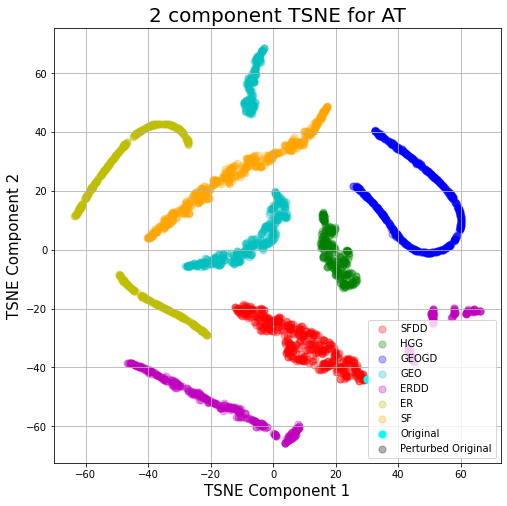

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE Component 1', fontsize = 15)
ax.set_ylabel('TSNE Component 2', fontsize = 15)
ax.set_title('2 component TSNE for {x}'.format(x=DESIRED_SPECIES), fontsize = 20)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange', 'cyan', 'black', 'lime', 'navy', 'pink']
targets = df_comb['class'].unique()
for target, color in zip(targets,colors):
    # if(target == 'HGG'):
    #   continue
    if(target == "Original"):
      alpha = 1
    else:
      alpha = 0.3
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'TSNE component 1']
               , finalDf.loc[indicesToKeep, 'TSNE component 2']
               , c = color
               , s = 50
               , alpha = alpha)
    
ax.legend(targets)
ax.grid()

In [ ]:
df_comb

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,class
0,0.108406,0.011703,0.022880,0.051760,9.933190e-05,0.129290,0.000986,0.000869,0.000099,0.171133,...,0.029524,4.073096e-06,0.000009,0.000144,0.010334,0.000013,0.000523,0.000007,8.457509e-08,SFDD
1,0.112006,0.012408,0.026719,0.049414,1.362727e-04,0.146453,0.001243,0.000885,0.000139,0.171966,...,0.043838,3.235247e-06,0.000013,0.000177,0.013512,0.000019,0.000595,0.000012,2.732426e-07,SFDD
2,0.122620,0.011666,0.022170,0.044653,1.241955e-04,0.101636,0.000908,0.000765,0.000100,0.141808,...,0.023860,4.344763e-06,0.000009,0.000102,0.007362,0.000013,0.000336,0.000006,1.171040e-07,SFDD
3,0.488885,0.172598,0.534881,0.567442,4.186815e-02,0.000152,0.316053,0.274056,0.246609,0.507170,...,0.000764,4.878682e-02,0.339747,0.391679,0.000170,0.343436,0.001152,0.323620,8.647127e-02,HGG
4,0.119280,0.000688,0.124804,0.001156,5.990471e-07,0.001486,0.000720,0.002090,0.006290,0.001112,...,0.001959,6.217531e-07,0.000071,0.000465,0.000492,0.000239,0.000431,0.000465,1.907689e-04,GEOGD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,0.183789,0.053537,0.201722,0.333067,1.147955e-01,0.923149,0.147161,0.114933,0.103275,0.708617,...,0.252676,2.642193e-02,0.202763,0.188856,0.374369,0.107326,0.133827,0.185081,4.662504e-01,Perturbed Original
3745,0.017911,0.168530,0.174314,0.307770,1.123217e-01,1.045278,0.008028,0.031462,0.007072,0.873719,...,0.899454,1.031599e-02,0.032530,0.058327,0.208368,0.051559,0.062973,0.195977,4.613400e-01,Perturbed Original
3746,0.203517,0.017608,0.297898,0.040564,7.388367e-02,1.058369,0.138003,0.140218,0.322090,0.655823,...,0.828702,3.483884e-02,0.162919,0.145893,0.330798,0.039457,0.122087,0.115155,1.061122e-01,Perturbed Original
3747,0.097007,0.084761,0.333485,0.118022,9.086204e-02,0.926301,0.046619,0.159572,0.623200,0.453714,...,0.495234,2.307393e-02,0.168894,0.052583,0.316127,0.025626,0.051350,0.011253,5.361032e-01,Perturbed Original
